# **Project Name**    - **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual

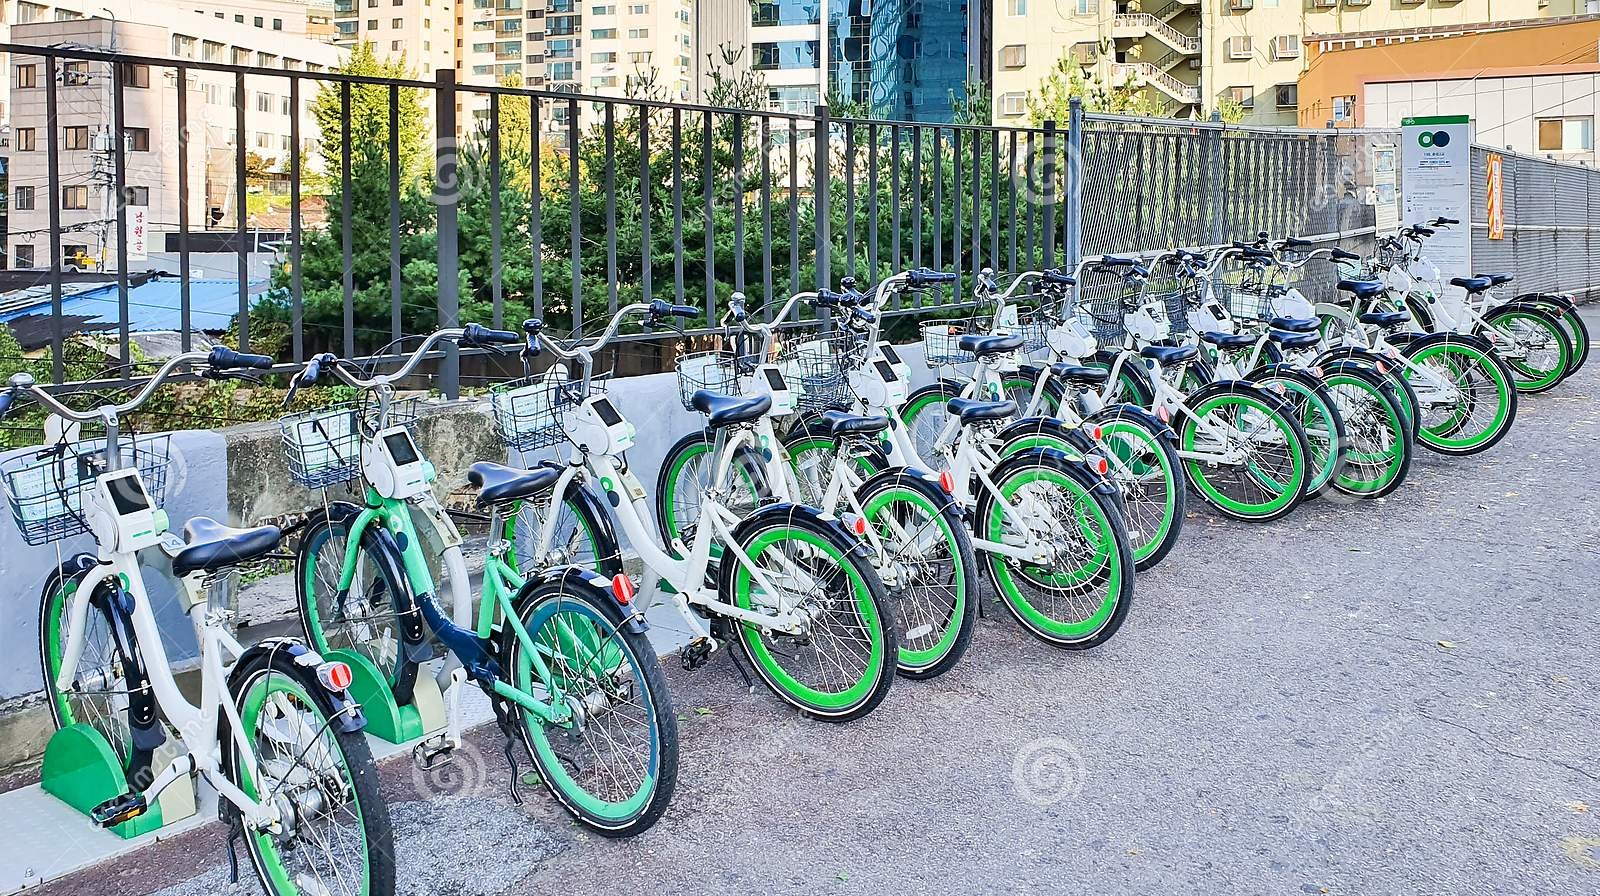

# **Project Summary -**

* Bike sharing is a transportation system that allows individuals to rent bicycles on a short-term basis, typically for a few hours or even minutes, and return them to designated locations. Bike sharing programs have gained popularity in cities around the world as a way to promote sustainable and affordable transportation options, while also reducing traffic congestion and carbon emissions. The demand for bike sharing services has been driven by factors such as increased awareness of environmental issues, rising urbanization, and the need for efficient and affordable transportation options. The growth of bike sharing has also been facilitated by advances in technology, which have enabled bike sharing operators to offer convenient mobile applications and user-friendly interfaces. And we have a bike sharing dataset of Seoul, South Korea.

* **The Approach I took in this analysis is as follows :-**

 1. Know the dataset

 2. Understanding Your Variables

 3. Data wrangling

 4. EDA

 5. Hypothesis testing

 6. Feature Engineering & Data Pre-processing

 7. ML model implementation

    Linear regression

    Decision Tree

    Random Forest Classifier

    LightGBM

    XG Boost Classifier

9. Conclusion

# **GitHub Link -**

https://github.com/Kalpesh-Nandedkar/Bike-Sharing-Demand-Prediction

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Data manipulation and visualization libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Statistical modeling libraries
import scipy.stats as stats

# Model selection and evaluation libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_error


# # Miscellaneous libraries
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Capstone Project Supervised ML - Regression/Bike Sharing Demand Prediction/SeoulBikeData.csv',encoding= 'unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
dataset.shape

(8760, 14)

### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

There are no Duplicate Values

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Above result says that there are no null values in the data

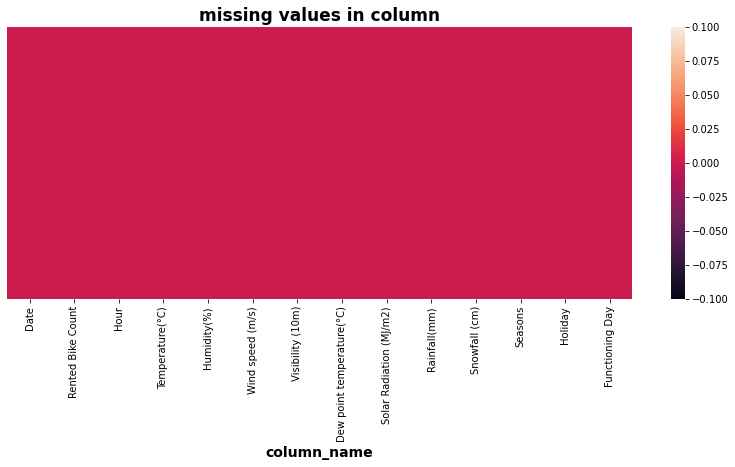

In [9]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(dataset.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
The dataset has 8,760 rows & 14 columns.
There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("Number of unique values in ",i," is ", dataset[i].nunique())

Number of unique values in  Date  is  365
Number of unique values in  Rented Bike Count  is  2166
Number of unique values in  Hour  is  24
Number of unique values in  Temperature(°C)  is  546
Number of unique values in  Humidity(%)  is  90
Number of unique values in  Wind speed (m/s)  is  65
Number of unique values in  Visibility (10m)  is  1789
Number of unique values in  Dew point temperature(°C)  is  556
Number of unique values in  Solar Radiation (MJ/m2)  is  345
Number of unique values in  Rainfall(mm)  is  61
Number of unique values in  Snowfall (cm)  is  51
Number of unique values in  Seasons  is  4
Number of unique values in  Holiday  is  2
Number of unique values in  Functioning Day  is  2


## 3. ***Data Wrangling***

#Creating Copy of our dataset

In [13]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to bike_df for our analysis
bike_df = dataset.copy()

# Changing data types of given data to proper data type

In [14]:
# finding the type of data of 'Date' column
type(bike_df['Date'][0])

str

In [15]:
# Changing 'Date' column from string to date-time format
bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x , "%d/%m/%Y"))
type(bike_df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

# Creating some new columns for our analysis

In [16]:
# extracting 'year' , 'month' & 'day' from 'date' column
bike_df['Year'] = bike_df['Date'].dt.year
bike_df['Month'] = bike_df['Date'].dt.month
bike_df['Day'] = bike_df['Date'].dt.day_name()

In [17]:
# Creating a new column 'weekend_weekdays'
bike_df['weekend_weekdays'] = bike_df['Day'].apply(lambda x: 'Weekend' if x == 'Saturday' or x == 'Sunday' else 'Weekday') 

In [18]:
# Creating a function to get the value of millions in our plot
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)

### What all manipulations have you done and insights you found?



* Based upon the initial assessment we found that the data was pretty much clean. Upon using the info() method, we draw out the following key insights about the data:-
  1.	The dataset has a shape of (8760, 14) which means that it contains approximately Eight Thousand Seven Hundred sixty rows and Fourteen columns.
  2.	Our Dataset has 6 columns with float64 dtype, 4 columns with int64 dtype, and 4 columns with object dtype.
  3.	In our Dataset, we observed that there are no null values in it
* Then we made a copy of original dataset to work on.
* Then we proceed for data cleaning init, We Checked for duplicate rows & found that there are no duplicated rows in Dataset.
* Then we changed the dataypes of columns to suitable dataypes.
* Then we created some new columns 'Year', 'Month', 'Day' & 'Weekend_Weekdays' to get the appropriate results.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#**Univariate Analysis**

### **Chart-1:** **Seasons count**

In [19]:
# Checking the value counts for the categorical varible Seasons
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

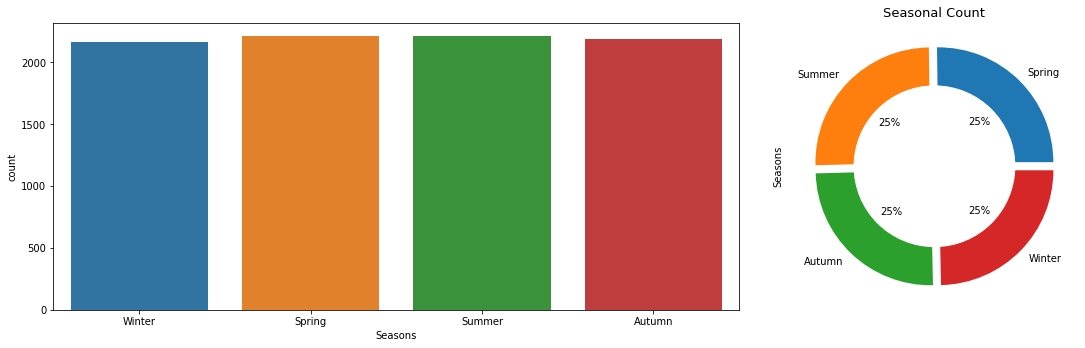

In [20]:
# setting the dimension for plots
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
# creating count plot for season
sns.countplot(bike_df['Seasons'], data=bike_df,ax = axes[0])
# Title for count plot
plt.title('Seasonal Count', fontsize=13)
# Creating pie chart for season
bike_df['Seasons'].value_counts().plot.pie(explode=[0.05, 0.05, 0.05, 0.05] , subplots=True, pctdistance=0.5,autopct='%0.0f%%',ax = axes[1], figsize=(15,7))
sns.set(style="darkgrid")
# drawing circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.tight_layout()
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**
- To analyze the count of seasons in our dataset.

**2. What is/are the insight(s) found from the chart?**
- The seasonal count is almost same.

**3. Will the gained insights help creating a positive business impact?**
- No, it won't As all season contribute the same impacts.

# **Chart-2:** **Holiday count**

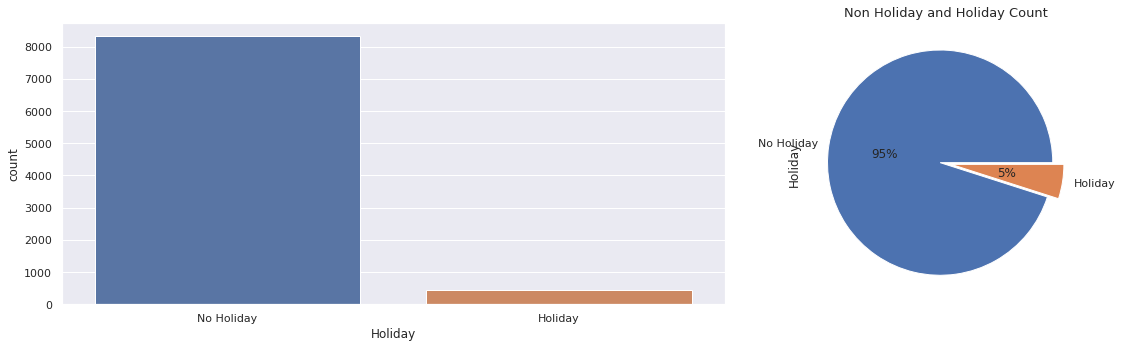

In [21]:
# setting the dimension for plots
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
# creating count plot for Holiday
sns.countplot(bike_df['Holiday'], data=bike_df,ax = axes[0])
# Title for count plot
plt.title('Non Holiday and Holiday Count', fontsize=13)
# Creating pie chart for Holiday
bike_df['Holiday'].value_counts().plot.pie(explode=[0.05, 0.05,] , subplots=True, pctdistance=0.5,autopct='%0.0f%%',ax = axes[1], figsize=(15,7))
sns.set(style="darkgrid")
fig.tight_layout()
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**
- To analyze the count of Holiday in our dataset.

**2. What is/are the insight(s) found from the chart?**
- The count of Non holiday is More in comparison to holiday. i.e 95:1 percent

**3. Will the gained insights help creating a positive business impact?**
- Yes, it will have a positive business impact because in Non holiday time there should be the more bike availability as compare to holiday time.

# **Chart-3: Functioning Day Count**

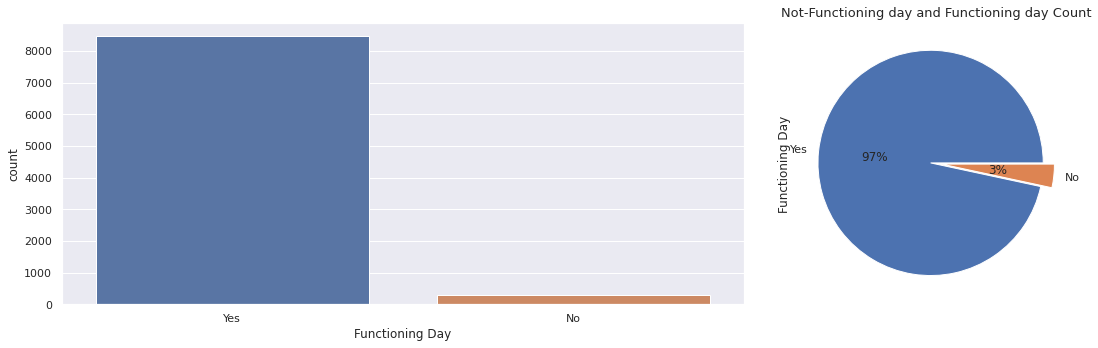

In [22]:
# setting the dimension for the plots
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
# creating count plot for 'Functioning Day'
sns.countplot(bike_df['Functioning Day'], data=bike_df,ax = axes[0])
# Title for count plot
plt.title('Not-Functioning day and Functioning day Count', fontsize=13)
# Creating pie chart for 'Functioning Day'
bike_df['Functioning Day'].value_counts().plot.pie(explode=[0.05, 0.05,] , subplots=True, pctdistance=0.5,autopct='%0.0f%%',ax = axes[1], figsize=(15,7))
sns.set(style="darkgrid")
fig.tight_layout()
plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**
- To analyze the count of Functioning Day in our dataset.

**2. What is/are the insight(s) found from the chart?**
- The functional hours is more than the Non functional hours.

**3. Will the gained insights help creating a positive business impact?**
- Yes, it will create a positive impact.

#**Bivariate Analysis**

# **Chart - 1 In which season most Bikes are Rented**

In [23]:
# creating a dataframe which contains rented bike counts in each seasaon
bike_rent_season = bike_df.groupby('Seasons')['Rented Bike Count'].sum().reset_index()
bike_rent_season

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


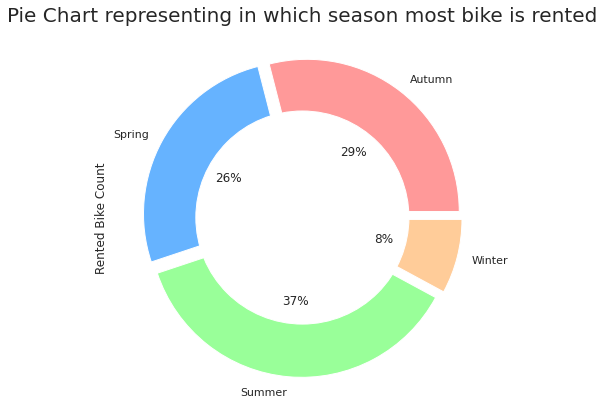

In [24]:
# Visualizing the pie chart for bike rented w.r.t. different seasons
plt.figure(figsize = (7,7))
# assigning the colours to pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
# creating a pie chart of bike count in different seasons
bike_rent_season['Rented Bike Count'].plot(kind='pie',labels = bike_rent_season['Seasons'], explode=[0.05, 0.05, 0.05, 0.05] , subplots=True, pctdistance=0.5,autopct='%0.0f%%',colors=colors)
plt.title("Pie Chart representing in which season most bike is rented", fontsize = 20)
# drawing a circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [25]:
# creating a dataframe which contains rented bike counts in each seasaon
df_seasons = bike_df.groupby('Seasons').sum()['Rented Bike Count']
# Dataframing the data for better visualization
bike_df_seasons = pd.DataFrame(df_seasons)

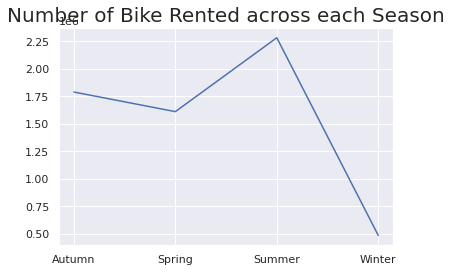

In [26]:
# Line plot showing the difference in rent rate in different seasons 
plt.plot(bike_df_seasons)
plt.title("Number of Bike Rented across each Season", fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

Here, Pie-chart & Line-Chart is used to visualize the percent & count of rented bike counts according to the season.

##### 2. What is/are the insight(s) found from the chart?

1. most bikes have been rented in the summer season.
2. least bike rent count is in winter season.
3. autumn and spring seasons have almost equal amounts of bike rent count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The gained insights can definitely help create a positive business impact. By understanding the seasonal trends in bike rental counts, the business can plan ahead and optimize their resources accordingly. For example, during the summer season where the demand for bikes is higher, the business can ensure that they have enough bikes in stock and have more staff available to handle the increased demand.

# **Chart - 2 In which year most bike are rented**

In [27]:
# creating a series which shows total number of bikes rented in each year
year_df = bike_df.groupby('Year')['Rented Bike Count'].sum()
# dataframing for better Visualization
bike_year_df = pd.DataFrame(year_df)
bike_year_df

,Rented Bike Count
Year,
2017,185330
2018,5986984


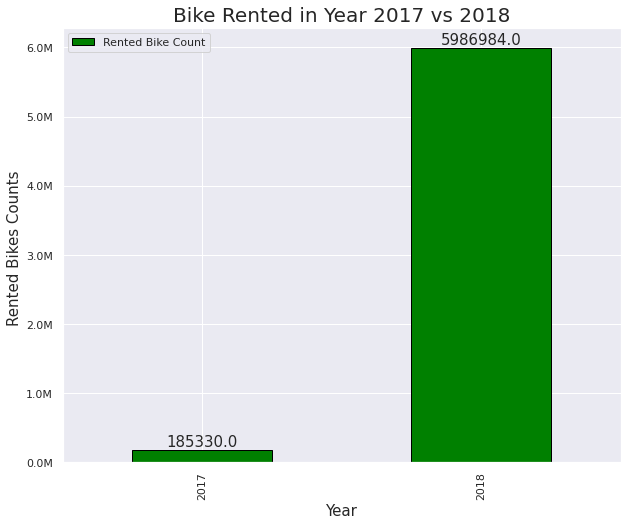

In [28]:
# Plotting Bar Chart for Bike Rented in each year
formatter = FuncFormatter(millions)
ax=bike_year_df.plot.bar(figsize=(10, 8),color=[ 'green', 'blue'],edgecolor='black')

# Set the title
ax.set_title("Bike Rented in Year 2017 vs 2018", fontsize = 20)

# Add annotation
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  

# Set x and y-labels
ax.set_xlabel("Year", fontsize = 15)
ax.set_ylabel("Rented Bikes Counts ", fontsize = 15)
ax.yaxis.set_major_formatter(formatter)
plt.show()

##### 1. Why did you pick the specific chart?

To know about bike rental count on Year 2017 & 2018.

##### 2. What is/are the insight(s) found from the chart?

* Above plot shows that most of the bikes have been rented in the year 2018.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes it will helps, but just a very limited percentage. As we dont have enough data on year 2017.

# **Chart - 3** **Most bikes are rented on Weekdays vs on Weekend**

In [29]:
# creating a series which shows total number of bikes rented on weekend & weekdays
week_df = bike_df.groupby('weekend_weekdays')['Rented Bike Count'].sum()
# dataframing for better Visualization
bike_week_df = pd.DataFrame(week_df)
bike_week_df

,Rented Bike Count
weekend_weekdays,
Weekday,4506628
Weekend,1665686


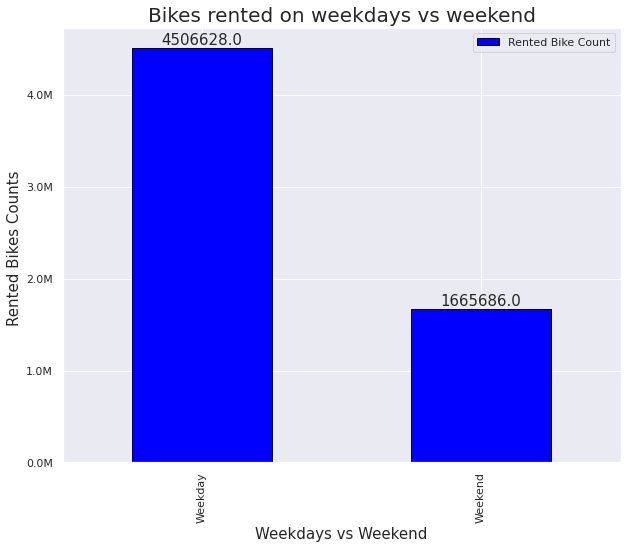

In [30]:
# Vizualising data using weekdays-weekend and rented bike count.
# Plotting Bar Chart for Bike Rented on weekend & weekdays
formatter = FuncFormatter(millions)
ax=bike_week_df.plot.bar(figsize=(10, 8),color=[ 'blue', 'green'],edgecolor='black')

# Set the title
ax.set_title('Bikes rented on weekdays vs weekend', fontsize = 20)

# Add annotation
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  

# Set x and y-labels
ax.set_xlabel("Weekdays vs Weekend", fontsize = 15)
ax.set_ylabel("Rented Bikes Counts ", fontsize = 15)
ax.yaxis.set_major_formatter(formatter)
plt.show()

In the week days the demand of the bike is higher because of the office as compare to the weekend.

##### 1. Why did you pick the specific chart?

* To know the count of bikes rented by weekdays and weekends.

##### 2. What is/are the insight(s) found from the chart?

* Based on the chart, we can observe that People rented most bike on Weekdays then on Weekend.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The insight that there are more bikes are rented on weekdays compared to weekends can help bike rental companies in managing their inventory and staff resources accordingly. They can allocate more bikes and staff during peak weekday hours to meet the demand and optimize their operations.

* On the other hand, if the company focuses only on weekdays and neglects weekends, they may miss out on potential business opportunities. While the demand may not be as high as weekdays, weekends still have a significant number of observations and can generate revenue for the company.

* Therefore, it is important to strike a balance between weekday and weekend operations to ensure optimal utilization of resources and maximize revenue.

# **Chart - 4 In which month most bikes are rented**

<Figure size 2000x1600 with 0 Axes>

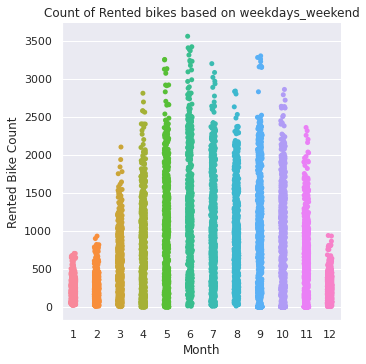

In [31]:
# Vizualisation on which month most bikes are rented
plt.figure(figsize=(10,8),dpi=200)
sns.catplot(x='Month',y='Rented Bike Count',data=bike_df)
plt.title('Count of Rented bikes based on weekdays_weekend')
plt.show()

##### 1. Why did you pick the specific chart?

* To check monthly average bike count.

##### 2. What is/are the insight(s) found from the chart?

* The demand of the rented bike is high between 5(May) to 10(October) months as compare to other months.
* While very less bikes have been rented in January, February & December which is winter season.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* During the months of May to October (5th to 10th months), there are typically high bike rentals rate. By keeping track of these peak periods of demand, the service provider can ensure that there are enough bikes available to meet customer needs and provide a high level of service.

# **Chart - 5 What is the Peak Hour for bike Renting**

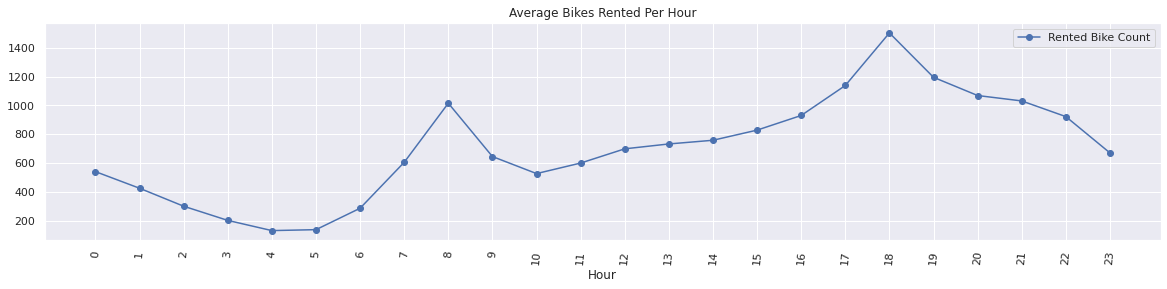

In [104]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = bike_df.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hour")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)
plt.show()

##### 1. Why did you pick the specific chart?

* To determine the hourly bike count, which hours have more or less bike count.

##### 2. What is/are the insight(s) found from the chart?

* High rise of Rented Bikes from 7:00 a.m to 10:00 p.m means people prefer rented bike during rush hour.

* We can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The bike rental count is higher between 7 to 9 o'clock in the morning as many people are commuting to work during this time. Similarly, between 16 to 22 o'clock, the bike rental count is also high as people are returning from work and some may prefer to use bikes for recreational purposes during this time. To ensure customer satisfaction, the service provider should keep in mind these peak hours and make sure to have more bikes available during these periods. This will help meet the demand of customers and provide a better overall service.

# **Chart - 6 - Analysis graph between the temperature and rented bike counts**

Text(0, 0.5, 'Rented bikes')

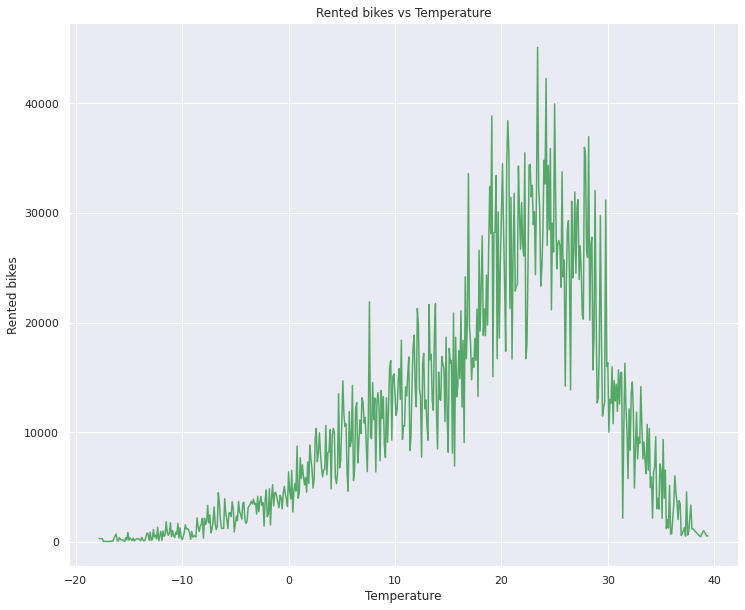

In [33]:
# taking the sum of 'Rented Bike Count' with respect to 'Temperature(°C)'
tem_rent=bike_df.groupby('Temperature(°C)')['Rented Bike Count'].sum()
# Plotting the graph between the temperature and rented bike counts
tem_rent.plot(color='g',figsize=(12, 10))
# Labelling 
plt.title('Rented bikes vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Rented bikes')

##### 1. Why did you pick the specific chart?

* Here, Lineplot is used to visualize the tred of rented bike counts according to the Temperature.

##### 2. What is/are the insight(s) found from the chart?

* From the graph, we can see that people prefer to take bike ride more often when the temperature is near about 25 degrees Celcius.
* We can easliy conclude that the people gave more preference to bike riding in summers as compare to other seasons.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, It will. Because it is more comfort when the temperature is neither too low or too high. 20-30 degree is the most moderate temp as we can see from the graph. so in the extreme condition the bike demand may hamper. so it will create a business impact

#**Chart - 7 - Analysis of bike count based on humidity**

Text(0, 0.5, 'Rented Bikes Count')

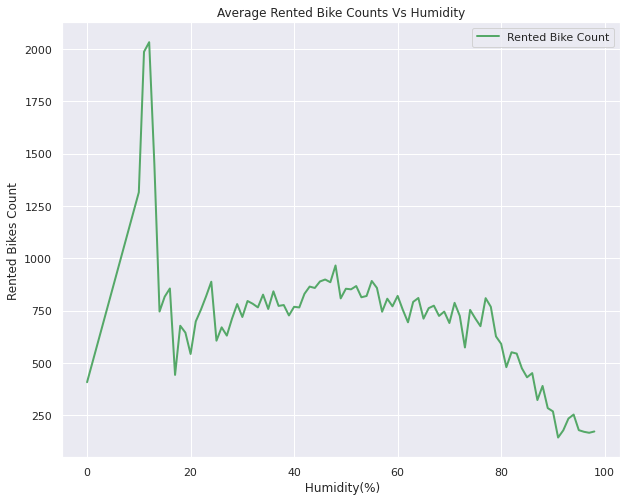

In [34]:
# Taking the mean of 'Rented Bike Count' with respect to 'Humidity(%)'
humidity_rent=bike_df.groupby('Humidity(%)')['Rented Bike Count'].mean()
# Dataframing for better visualization 
humidity_df=pd.DataFrame(humidity_rent)

# Plot the graph between the Humidity and Average Rented Bike counts
humidity_df.plot(kind='line', linewidth=2, markersize=12,animated=True, color='g',figsize=(10, 8))
# Labelling the graph
plt.title('Average Rented Bike Counts Vs Humidity')
plt.xlabel(' Humidity(%)')
plt.ylabel('Rented Bikes Count')

##### 1. Why did you pick the specific chart?

* A linechart is used to visualize the demand of bike count according to humidity

##### 2. What is/are the insight(s) found from the chart?

* When humidity levels are less than 20% the rented bike counts are quite high.
* When humidity levels are greater than 50% the rented bike count decreased rapidly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* There was a sudden peak in the bike count between 10 and 15 percent humidity. We need to increase our supply, particularly on those days, because we may get new potential customers, retain them, and then convert them into our regular customers.

# **Chart - 8 - Bike count with respect to Rainfall**

In [35]:
# Rented bike count on the basis of Rainfall
rainfall_rent=bike_df.groupby('Rainfall(mm)')['Rented Bike Count'].mean()
rainfall_df=pd.DataFrame(rainfall_rent)


Text(0, 0.5, 'Rented Bikes Count')

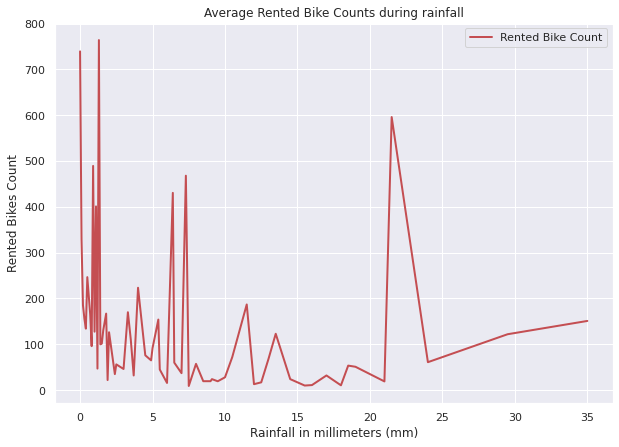

In [36]:
# Plot the graph between the rainfall and Average Rented Bike counts
rainfall_df.plot(kind='line',linewidth=2, markersize=12,animated=True, color='r',figsize=(10, 7))
plt.title('Average Rented Bike Counts during rainfall')
plt.xlabel('Rainfall in millimeters (mm)')
plt.ylabel('Rented Bikes Count')

##### 1. Why did you pick the specific chart?

* A linechart is used to visualize the Rented Bike Counts according to the Rainfall

##### 2. What is/are the insight(s) found from the chart?

* As we can see the demand for rented bikes is very high when there is no rainfall, which decreases as rainfall increases.
* We are also able to witness a spike in bike count around 22mm of rainfall.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* As we all know Rainfall is typically measured in units of length, such as millimeters or inches, the same is replicated in the above chart.

* The amount of rainfall can vary greatly from one region to another, and can be affected by factors such as topography, climate, and atmospheric circulation patterns.

* Also, it differes from person to person that some people enjoy riding a bike during rainfall and some may not and this is the reason that we can see a sudden increase in demand of bikes even during rainfall.

* We can say that the business is not much impacted due to rainfall as it can also have a positive impact on the business.

# **Chart - 9 - Effect of Visibility on Renting bike**

In [37]:
# Rented bike count on the basis of Visibility
visibility_rent=bike_df.groupby('Visibility (10m)')['Rented Bike Count'].mean()
visibility_df=pd.DataFrame(visibility_rent)


Text(0, 0.5, 'Rented Bikes Count')

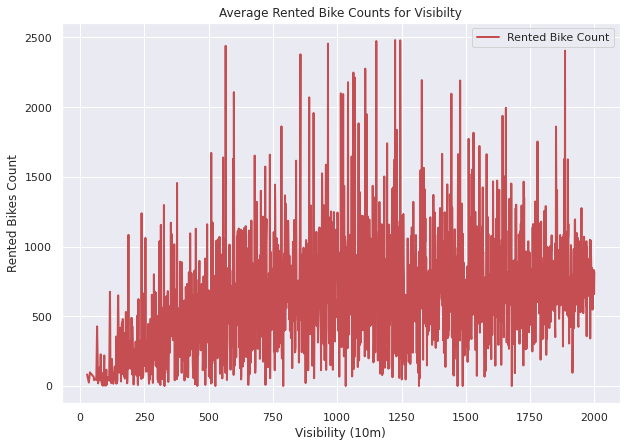

In [38]:
# Plot the for visibility  and Average Rented Bike counts
visibility_df.plot(kind='line',linewidth=2, markersize=12,animated=True, color='r',figsize=(10,7))
# Labelling the data
plt.title('Average Rented Bike Counts for Visibilty')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bikes Count')

##### 1. Why did you pick the specific chart?

* A linechart is used to visualize the Rented Bike Counts according to the visibilty.

##### 2. What is/are the insight(s) found from the chart?

* It is clearly visible from the graph, the rented bike count increase with an increase in invisibility.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* It will help because when there is no visibility the demand of bike is low.

# **Chart - 10 - Effect of Snowfall on the count of bike rented**

Text(0, 0.5, 'Rented Bikes Count')

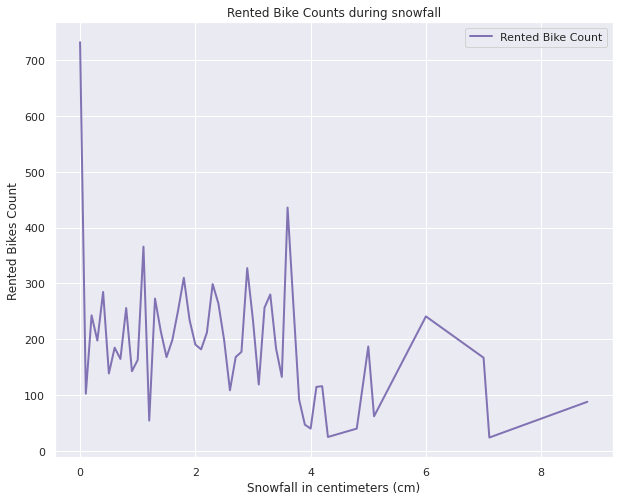

In [39]:
# Taking the count of 'Rented Bike Count' with respect to 'Snowfall (cm)'
snowfall_rent=bike_df.groupby('Snowfall (cm)')['Rented Bike Count'].mean()
# Dataframing it for better visualization
snowfall_df=pd.DataFrame(snowfall_rent)

# Plot the graph between the snowfall and Rented Bike counts
snowfall_df.plot(kind='line',linewidth=2, markersize=12,animated=True, color='m',figsize=(10, 8))
# Labelling the graph
plt.title('Rented Bike Counts during snowfall')
plt.xlabel('Snowfall in centimeters (cm)')
plt.ylabel('Rented Bikes Count')

##### 1. Why did you pick the specific chart?

* A linechart is used to visualize the Rented Bike Counts according to the Snow fall.

##### 2. What is/are the insight(s) found from the chart?

* Mostly bikes were taken on rent when snowfall is less than 4cm.
* It is very difficult to drive bikes in snow so the usage of bikes decreases in the high snowfall.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* This insight kind of helps in knowing what can lead to negative growth, because if we have a bad year with most of the days having snow it'll adversely impact the rental bike count avg for the year.

* Eventhough having snow is not in our control, renting bikes in non-snow regions will have higher bike rental rate and helps in business growth to start in those regions.

#**Multivariate Analysis**

# **Chart - 1 - Relationship between hour & rented bike count with respect to season**

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

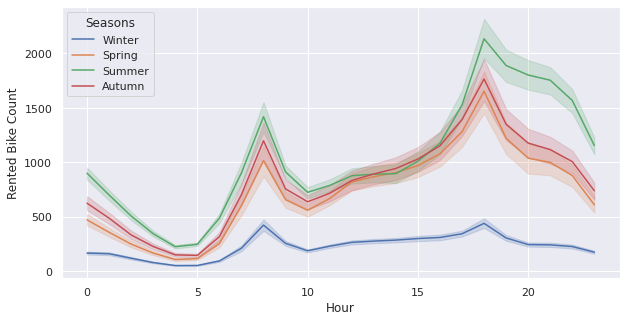

In [40]:
# line plot of hour vs rented bike count with respect to seasons
plt.figure(figsize = (10,5))
sns.lineplot(data = bike_df, x = 'Hour', y = 'Rented Bike Count', hue = 'Seasons')

##### 1. Why did you pick the specific chart?

* A line plot is a type of graph that displays data as points and it is useful for displaying continuous data over time or space, and we picked these data to plot relationship between Rented Bike Count and Seasons

##### 2. What is/are the insight(s) found from the chart?

* The above plot indicates that people prefer renting bike more in summer season and least in winter season.
* Looking at the time it is possible that people going to offices use bikes for commute.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Through this it is clear that people are preffering more bikes in summer so avalibility of bikes should be maximum in summer

#### Chart - 14 - Correlation Heatmap

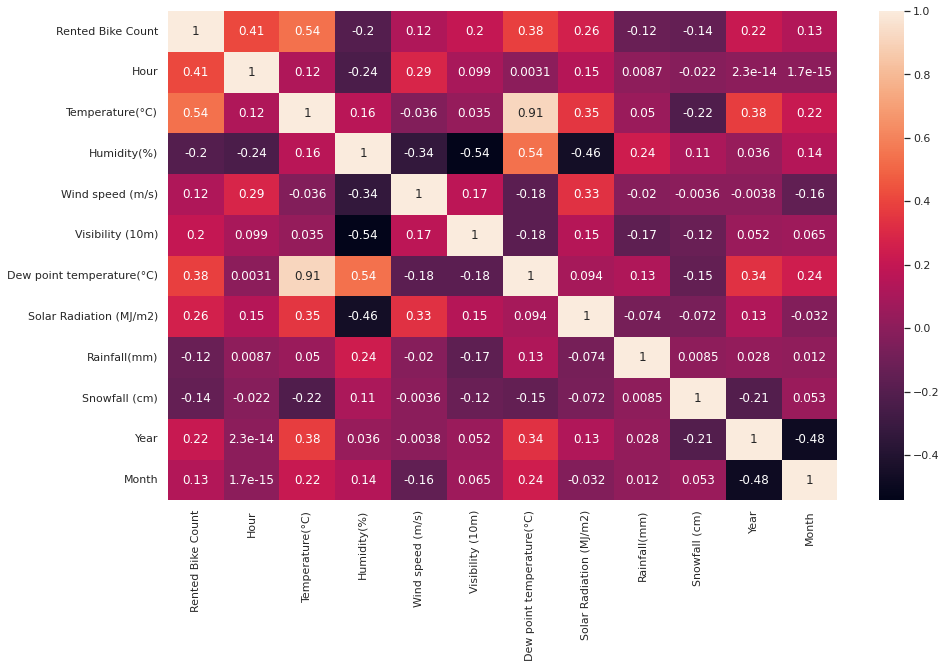

In [41]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,9))
sns.heatmap(bike_df.corr(),annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

* To check the correlation between different variables.

##### 2. What is/are the insight(s) found from the chart?

* A highly correlation between following variables.
 * dew point temp and temp has correlation of 91%.. (Any one feature shopuld be dropped beacause of high correlation and we will do it in the feature selction section)
 * dew point temp with humidity 54%.
 * Rented bike count with temp is 54%.

# **Chart - Pair Plot - Analysis of distribution of numerical features with target values** 

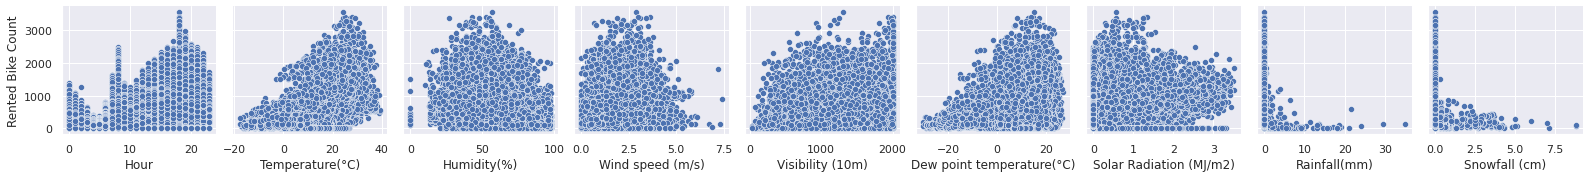

In [42]:
# Pair Plot visualization code
sns.set(rc={'figure.figsize':(15,12)})
g=sns.pairplot(x_vars=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
             ,y_vars='Rented Bike Count',data=bike_df,palette='Dark2')

##### 1. Why did you pick the specific chart?

* Here, pairplot is used to visualize the distribution of different numerical features with target features.

##### 2. What is/are the insight(s) found from the chart?

* The given problem is solved by the regression model but from the above pairplot, we can see that the relationship between the independent variable and the dependent variable is not linear. So it shows that a linear regression fitting might not be the best model for it.
* A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. There is a significant relationship between temperature and the number of rented bikes.
2. The average number of rented bikes on non-holiday days is greater than that on holidays.
3. Humidity and Temperature are dependent Variables.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis(H0): There is no significant relationship between temperature and the number of rented bikes.

* Alternative hypothesis(H1): There is a significant relationship between temperature and the number of rented bikes.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value
# Conduct correlation test to assess the relationship between Hour and Rented_Bike_Count
corr_temp = stats.pearsonr(bike_df['Temperature(°C)'],bike_df['Rented Bike Count'])

# Print the correlation coefficient and p-value
print('Correlation coefficient:', corr_temp[0])
print('p-value:', corr_temp[1])

# Final statement
if corr_temp[1] < 0.05:
    print('Reject the null hypothesis. There is a significant relationship between temperature and the number of rented bikes.')
else:
    print('Fail to reject the null hypothesis. There is no significant relationship between temperature and the number of rented bikes')

Correlation coefficient: 0.5385581530139791
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between temperature and the number of rented bikes.


##### Which statistical test have you done to obtain P-Value?

We used a Pearson's Correlation test to obtain a P-value.

##### Why did you choose the specific statistical test?

We want to determine whether there is a significant relationship between temperature and the number of rented bike or not.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis (H0): The average number of rented bikes on non-holiday days is less than or equal to that on holidays.

* Alternative hypothesis (H1): The average number of rented bikes on non-holiday days is greater than that on holidays.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value
# Conduct t-test to compare mean Rented_Bike_Count between holidays and non-holidays
ttest_holiday = stats.ttest_ind(bike_df[bike_df['Holiday']=='Holiday']['Rented Bike Count'],
                                bike_df[bike_df['Holiday']=='No Holiday']['Rented Bike Count'])

# Print the t-statistic and p-value
print('t-statistic:', ttest_holiday.statistic)
print('p-value:', ttest_holiday.pvalue)

# Final statement
if ttest_holiday.pvalue < 0.05:
    print('Reject the null hypothesis. The average number of rented bikes on non-holiday days is greater than that on holidays.')
else:
    print('Fail to reject the null hypothesis. The average number of rented bikes on non-holiday days is less than or equal to that on holidays.')

t-statistic: -6.7874340454159166
p-value: 1.2156443235024855e-11
Reject the null hypothesis. The average number of rented bikes on non-holiday days is greater than that on holidays.


##### Which statistical test have you done to obtain P-Value?

* We used a two sample t-test to obtain a p-value.

##### Why did you choose the specific statistical test?

* We want to determine whether the average number of rented bikes on non-holiday days is greater than that on holidays or not.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis(H0): Humidity and Temperature independent

* Alternate Hypothesis(H1 or Ha): Humidity and Temperature are dependent samples

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import spearmanr
stat, p = spearmanr(bike_df['Temperature(°C)'], bike_df['Dew point temperature(°C)'])
# Print the stat and p-value
print('stat=%.3f, p=%5f' % (stat, p))
# Final statement
if(p>0.05):
  print('Null Hypothesis accepted. temp and dew_point_temp are independent')
else:
  print('Rejected Null Hypothesis. temp and dew_point_temp are dependent')

stat=0.912, p=0.000000
Rejected Null Hypothesis. temp and dew_point_temp are dependent


##### Which statistical test have you done to obtain P-Value?

* The Spearman's Rank Correlation Test

##### Why did you choose the specific statistical test?

* The Spearman's rank correlation coefficient (rs) is a method of testing the strength and direction (positive or negative) of the correlation (relationship or connection) between two variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Year                         0
Month                        0
Day                          0
weekend_weekdays             0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

* We checked if there were any missing values in our dataset.  As we can see from the above result, there are no missing values in the dataset.

### 2. Handling Outliers

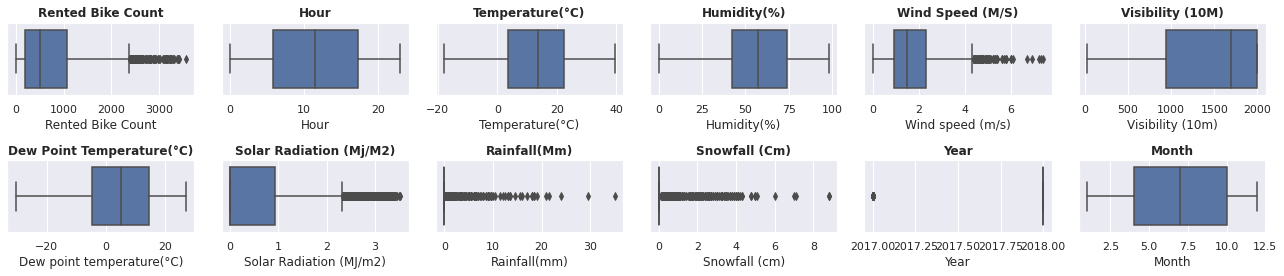

In [47]:
# Checking for Outliers
# Creating Boxplot for outlier detection
plt.figure(figsize=(18,4))
for n,column in enumerate(bike_df.describe().columns):
  plt.subplot(2, 6, n+1)
  sns.boxplot(bike_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [48]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Day',
       'weekend_weekdays'],
      dtype='object')

In [49]:
# Handling outlier
outlier_col = ['Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# calculate interquartile range
for col in outlier_col:
  Q1= bike_df[col].quantile(0.25)
  Q3= bike_df[col].quantile(0.75)
  IQR= (Q3-Q1)
  lower_limit = Q1 - (IQR * 1.5)
  upper_limit = Q3 + (IQR * 1.5)

# Identify the outliers using the lower and upper bounds
outliers = (bike_df[col] < lower_limit) & (bike_df[col] > upper_limit)

# Handle the outliers by replacing them with the column's median value
bike_df.loc[outliers, col] = bike_df[col].median()

##### What all outlier treatment techniques have you used and why did you use those techniques?

* We used the interquartile range (IQR) technique to measure the spread of the middle half of the data and assess the variability, which indicates where most of the values lie. Larger values indicate that the central portion of the data is spread out further.

### 3. Categorical Encoding

In [50]:
# Encode your categorical columns
categorical_features= bike_df.select_dtypes(include='object')

In [51]:
categorical_features

,Seasons,Holiday,Functioning Day,Day,weekend_weekdays
0,Winter,No Holiday,Yes,Friday,Weekday
1,Winter,No Holiday,Yes,Friday,Weekday
2,Winter,No Holiday,Yes,Friday,Weekday
3,Winter,No Holiday,Yes,Friday,Weekday
4,Winter,No Holiday,Yes,Friday,Weekday
...,...,...,...,...,...
8755,Autumn,No Holiday,Yes,Friday,Weekday
8756,Autumn,No Holiday,Yes,Friday,Weekday
8757,Autumn,No Holiday,Yes,Friday,Weekday
8758,Autumn,No Holiday,Yes,Friday,Weekday


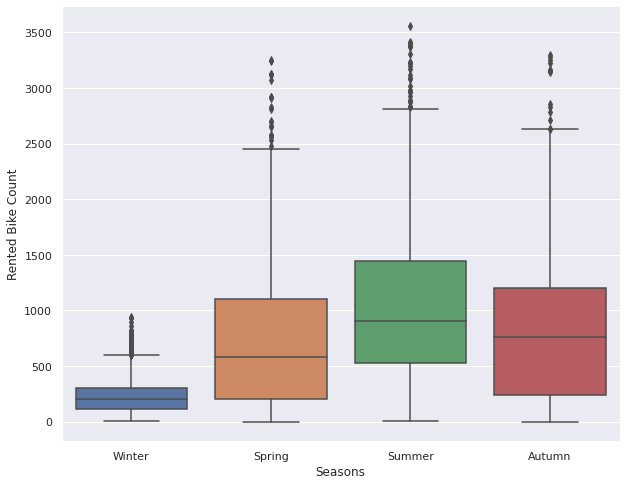

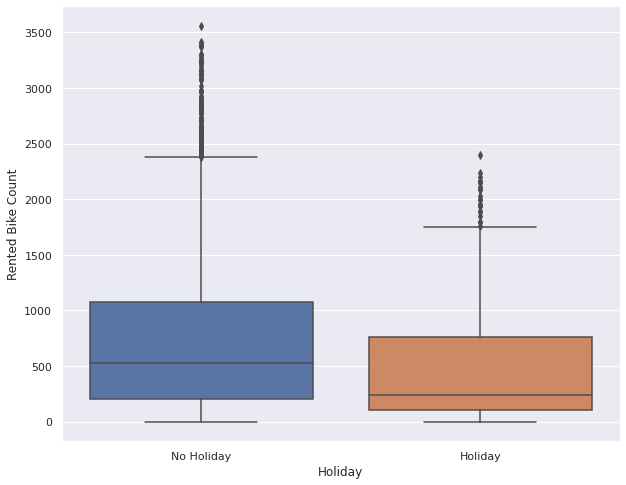

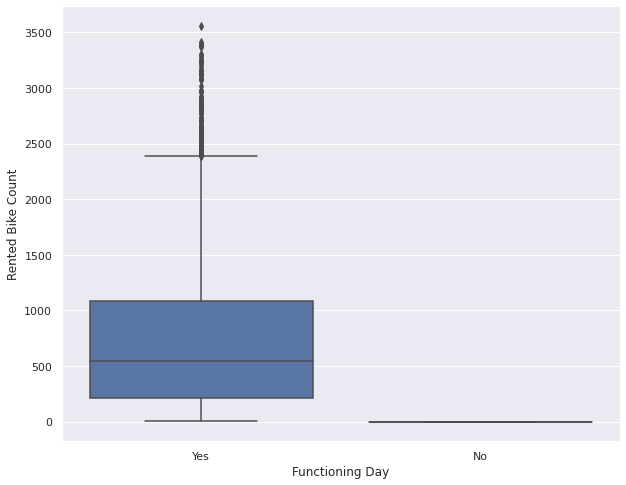

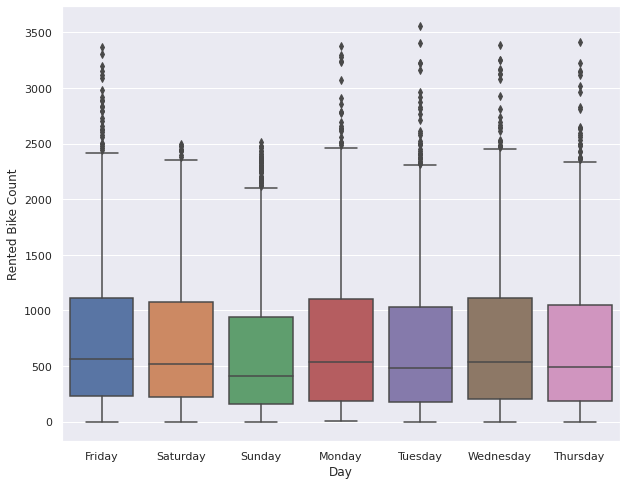

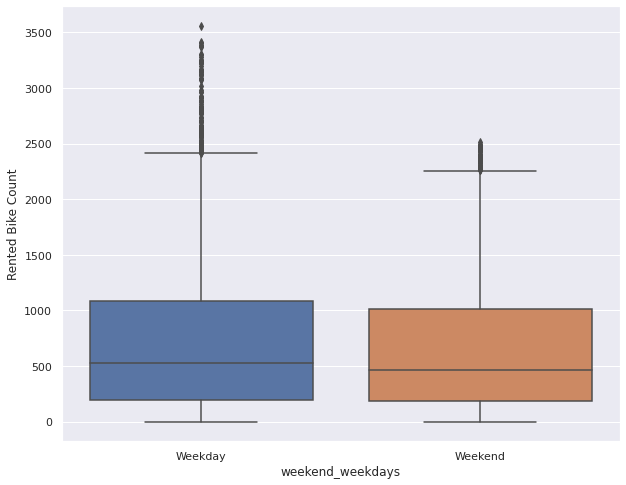

In [52]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=bike_df[col],y=bike_df["Rented Bike Count"])
  plt.show()

#### What all categorical encoding techniques have you used & why did you use those techniques?

* I have used one-hot encoding technique to change our categorical features of object type into int type by creating their dummies so that it becomes compatible to feed it into various ML algorithms in future.

* I have 3 to 4 unique orderless categories in all the categorical features (which is less in number). So, it is good to use Nominal encoding technique than ordinal.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [53]:
# Manipulate Features to minimize feature correlation and create new 
# we already create new features like 'Day','month','Year' and 'weekdays_weekend'.

#### 2. Feature Selection

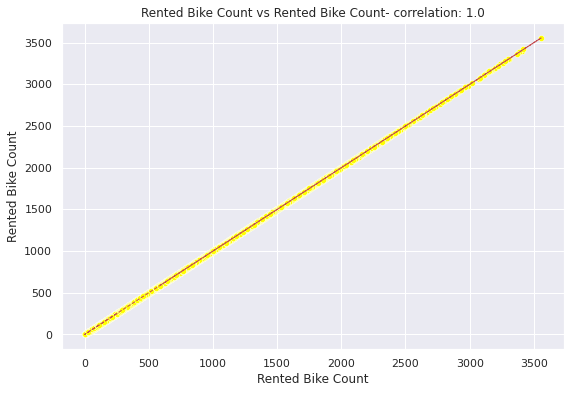

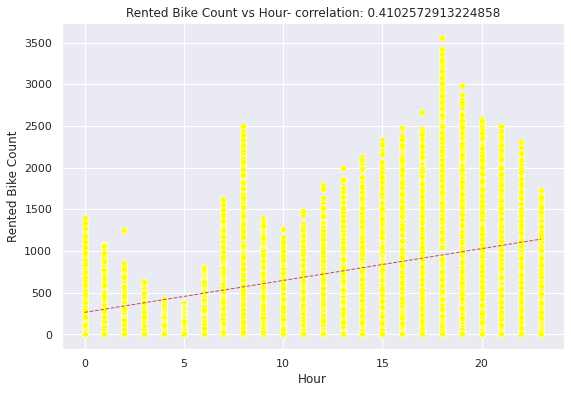

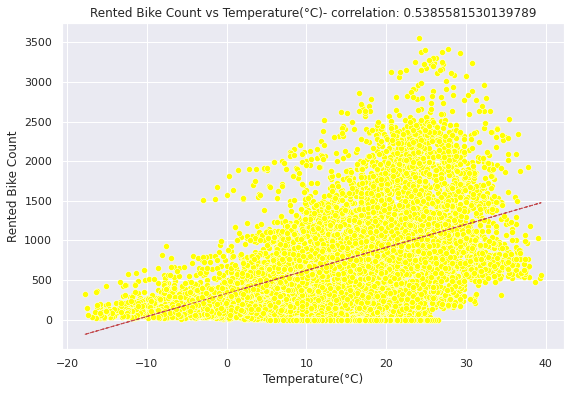

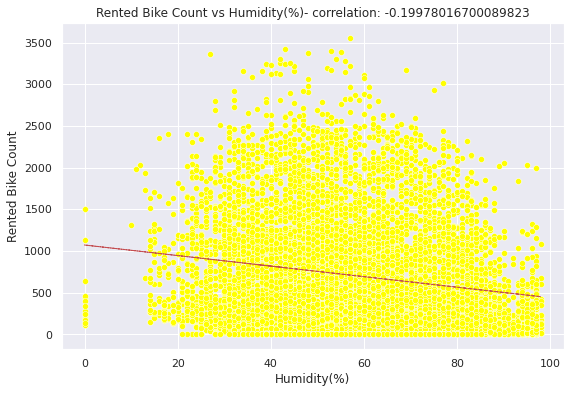

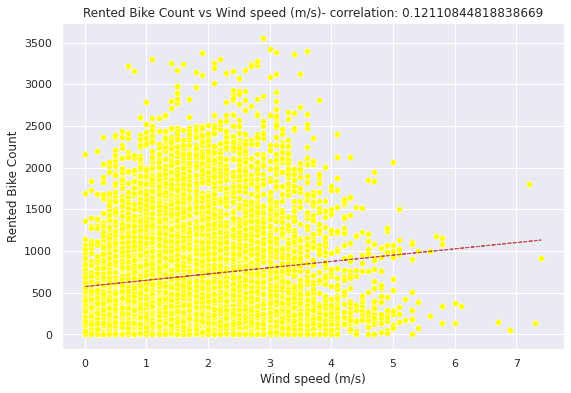

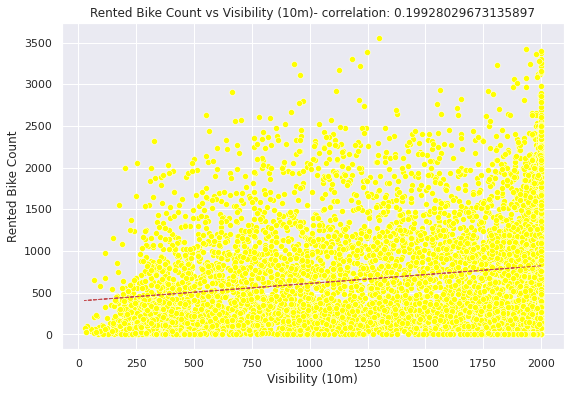

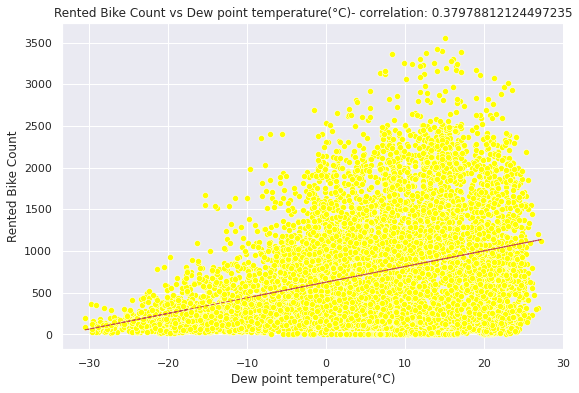

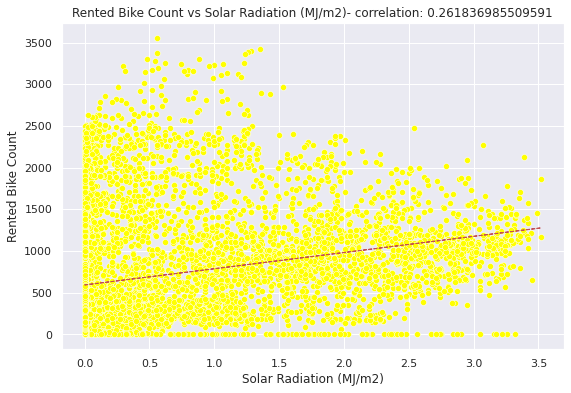

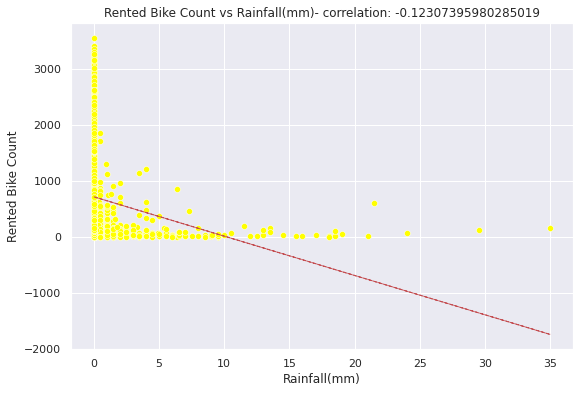

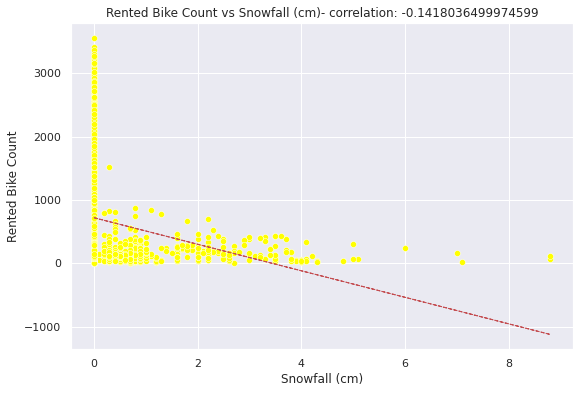

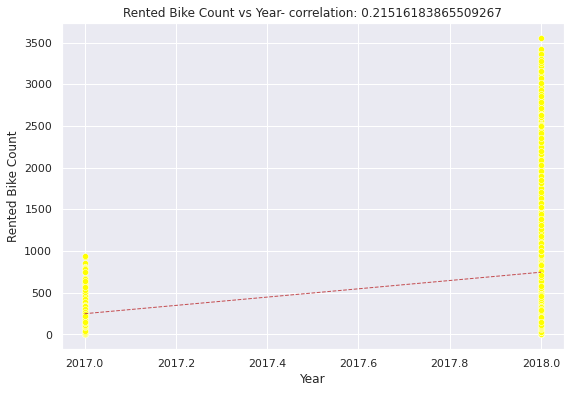

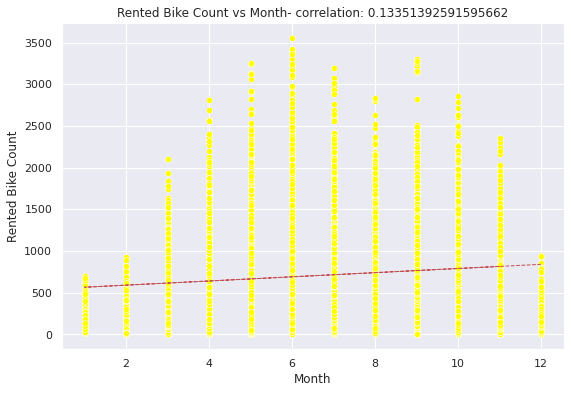

In [54]:
# Let's see how Rented Bike Count and other features are related
for col in bike_df.describe().columns.tolist():
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    label = bike_df['Rented Bike Count']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="yellow")
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(bike_df[col], bike_df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(bike_df[col])
    plt.plot(bike_df[col], y_hat, "r--", lw=1)
    plt.show()

<AxesSubplot:>

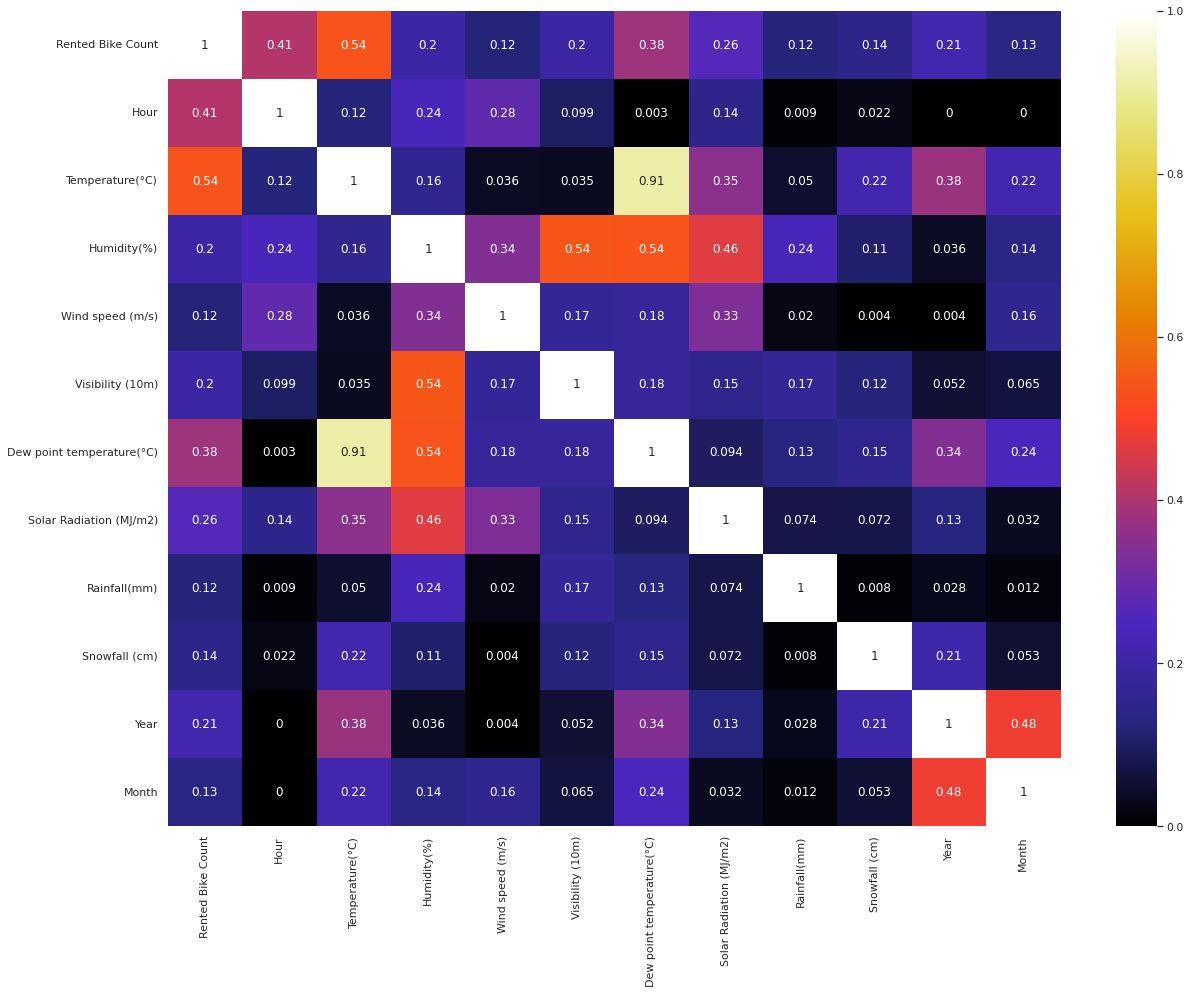

In [55]:
# Select your features wisely to avoid overfitting
plt.figure(figsize=(20,15))
sns.heatmap(abs(round(bike_df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

* 'Dew Point Temperature' and 'Temperature' have a high correlation. The target variable 'Rented Bike Count' is also highly correlated with 'Temperature'.

In [56]:
X = bike_df.iloc[:,2:]
y = bike_df.iloc[:,1]

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [58]:
calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Hour,4.455990
1,Temperature(°C),188.601545
2,Humidity(%),187.103431
3,Wind speed (m/s),4.886893
4,Visibility (10m),10.526353
5,Dew point temperature(°C),126.950468
6,Solar Radiation (MJ/m2),2.889104
7,Rainfall(mm),1.103358
8,Snowfall (cm),1.139788
9,Year,398.864334


In [59]:
#Dew Point Temperature is highly correlated .let's delete this variable and check the VIF score again.
del X['Dew point temperature(°C)']

In [60]:
calc_vif(X.select_dtypes(include=['float','int']))
#Each variable is within the range between 1 and 5.

,variables,VIF
0,Hour,4.447602
1,Temperature(°C),3.614916
2,Humidity(%),23.479156
3,Wind speed (m/s),4.879251
4,Visibility (10m),10.457654
5,Solar Radiation (MJ/m2),2.751430
6,Rainfall(mm),1.089211
7,Snowfall (cm),1.134624
8,Year,54.779004
9,Month,5.107309


##### What all feature selection methods have you used  and why?

* I used heatmap correlation to select important features because this technique showed that certain features are highly correlated with each other, which may result in overfitting of the model.

##### Which all features you found important and why?

* 'Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour', 'month','weekdays_weekend', 'Seasons', 'Holiday', 'Functioning_Day' are important features because the target feature 'Rented_Bike_Count' is dependent on all of them.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

* Yes, we need to transform our target variable "Rented_Bike_Count", and to do so, we have used a square root transformation to convert the right-skewed distribution to a normal distribution.

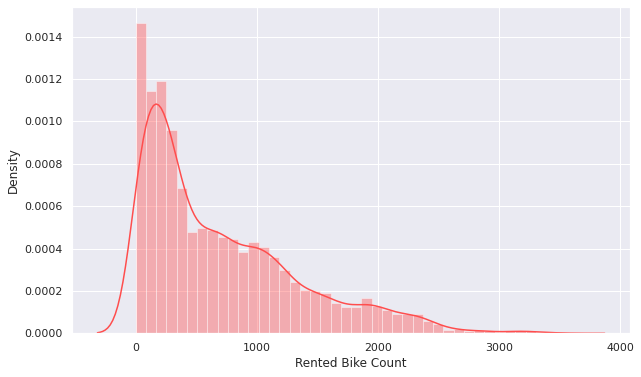

In [61]:
# Transform Your data
# Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
sns.distplot(bike_df['Rented Bike Count'], color = '#ff4d4d')
plt.show()

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

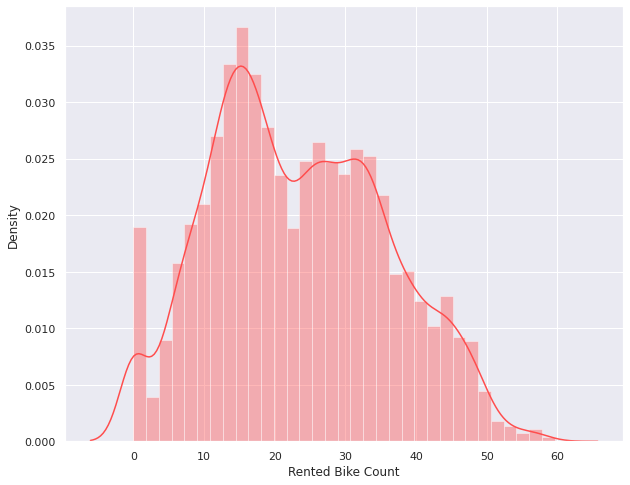

In [62]:
# Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(bike_df['Rented Bike Count']), color='#ff4d4d')

### 6. Data Scaling

In [63]:
# Scaling your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(7008, 15)
(1752, 15)


In [64]:
# Separating "x" and "y" variables
X= bike_df[['Date']]
y= bike_df[['Rented Bike Count']]

print(X.shape)
print(y.shape)

(8760, 1)
(8760, 1)


In [65]:
# Scaling your data
# Importing StandardScaler library
from sklearn.preprocessing import StandardScaler

In [66]:
# Creating object
std_regressor= StandardScaler()

In [67]:
# Fit and Transform
X= std_regressor.fit_transform(X)

##### Which method have you used to scale you data and why?

* I have used StandardScaler of sklearn library to scale our data. This is important for us, as features on different scales can lead to poor performance or slow convergence. Standardizing the features also makes it easier to compare different features or observe the effect of a feature on the target variable("Rented Bike Count") by comparing the magnitude of its coefficient. Additionally, we are going to apply linear regression model for which having normally distributed data is the statistical assumption of the model, which standardization can help enforce.

### 7. Data Splitting

In [68]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [69]:
# Checking the shape after spliting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6570, 1), (2190, 1), (6570, 1), (2190, 1))

##### What data splitting ratio have you used and why? 

* Since our dataset is huge and have nearly obsevations. So, We have assigned 80% data into train set and 20% into the test set with random_state=0 so that we do not get different observations in every split.

## ***7. ML Model Implementation***

### ML Model - 1

In [70]:
# ML Model - 1 Implementation
#importing different Regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
     

# Defining the function that calculated regression metrics
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)

  print("-"*50)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)
  print("-"*50)

  ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)  
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

#creating dictionary for storing different models accuracy
model_comparison={}

# Fit the Algorithm
model=LinearRegression()
model.fit(X_train,y_train)

# Predict on the model
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]


Model R-Square : 10.35%
Model MSE : 36857260.30%
Cross Val Accuracy: 11.92 %
Cross Val Standard Deviation: 1.11 %


In [71]:
# ML Model - 1 Implementation
linear_regressor= LinearRegression()

# Fit the Algorithm
linear_regressor.fit(X_train,y_train)

# Predict the model
y_train_regression_pred= linear_regressor.predict(X_train)
y_test_regression_pred= linear_regressor.predict(X_test)

In [72]:
# Checking the coefficients
linear_regressor.coef_

array([[223.319701]])

In [73]:
# Checking the intercept
linear_regressor.intercept_


array([703.65385826])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_regression_pred,y_test,y_test_regression_pred)

--------------------------------------------------
MAE on train is: 459.76706206721923
MAE on test is: 460.4580737971344
--------------------------------------------------
MSE on train is: 367385.7138117211
MSE on test is: 368572.60304773843
--------------------------------------------------
RMSE on train is: 606.1235136601459
RMSE on test is: 607.1018061641214
--------------------------------------------------
MAPE on train is: 1.378276744614524e+19  %
MAPE on test is: 1.467640774162342e+19  %
--------------------------------------------------
R2 on train is: 0.12018796388751629
R2 on test is: 0.1035203024618978
--------------------------------------------------
Accuracy of train is: -1.378276744614524e+19  %
Accuracy of test is: -1.467640774162342e+19  %
--------------------------------------------------


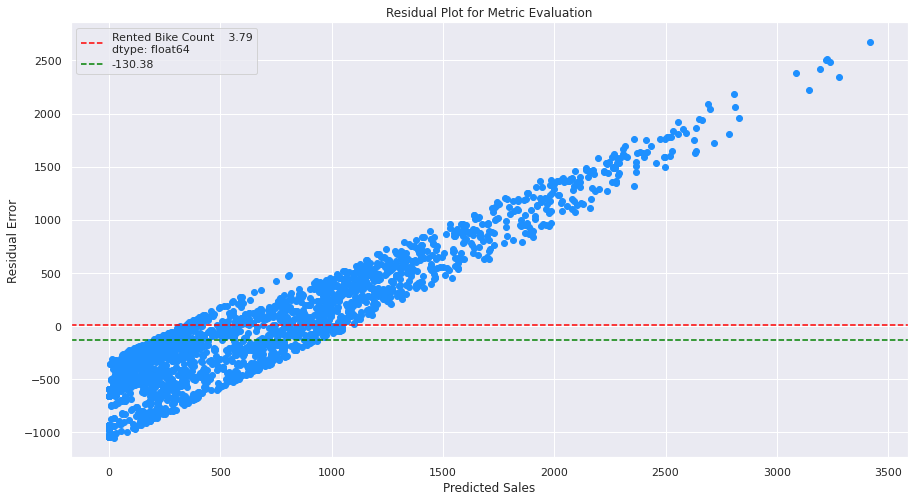

In [75]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
residuals = y_test - y_test_regression_pred
Mean= round(np.mean(residuals),2)
Median= round(np.median(residuals),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals, c="dodgerblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=Mean)
plt.axhline(y=np.nanmedian(residuals), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

# RIDGE REGRESSION

In [76]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
ridge= Ridge()

# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17], "max_iter":[1,2,3]}

# Train the model
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(X_train,y_train)

# Predict the output
y_train_ridge_pred = ridgeR.predict(X_train)
y_test_ridge_pred = ridgeR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {ridgeR.best_params_}")
print(f"Negative mean square error is: {ridgeR.best_score_}")
     


The best alpha value found out to be: {'alpha': 5, 'max_iter': 1}
Negative mean square error is: -367485.19826572685


In [77]:
# Calculating regression metrics for Ridge
regression_metrics(y_train,y_train_ridge_pred,y_test,y_test_ridge_pred)

--------------------------------------------------
MAE on train is: 459.7906812485138
MAE on test is: 460.47627405294617
--------------------------------------------------
MSE on train is: 367385.74247114494
MSE on test is: 368567.8638204389
--------------------------------------------------
RMSE on train is: 606.1235373017162
RMSE on test is: 607.0979029945985
--------------------------------------------------
MAPE on train is: 1.3780286951852972e+19  %
MAPE on test is: 1.4673725121508274e+19  %
--------------------------------------------------
R2 on train is: 0.12018789525418327
R2 on test is: 0.1035318296915968
--------------------------------------------------
Accuracy of train is: -1.3780286951852972e+19  %
Accuracy of test is: -1.4673725121508274e+19  %
--------------------------------------------------


#  LASSO REGRESSION

In [78]:
# import lasso regression from sklearn library
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
lasso= Lasso()

# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5], "max_iter":[7,8,9,10]}

# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(X_train,y_train)

# Predict the output
y_train_lasso_pred = lassoR.predict(X_train)
y_test_lasso_pred = lassoR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")

The best alpha value found out to be: {'alpha': 1e-05, 'max_iter': 7}
Negative mean square error is: -367529.1932139858


In [79]:
# Calculating regression metrics for Lasso
regression_metrics(y_train,y_train_lasso_pred,y_test,y_test_lasso_pred)

--------------------------------------------------
MAE on train is: 459.767063457064
MAE on test is: 460.4580748688365
--------------------------------------------------
MSE on train is: 367385.7138117212
MSE on test is: 368572.6027670291
--------------------------------------------------
RMSE on train is: 606.123513660146
RMSE on test is: 607.1018059329333
--------------------------------------------------
MAPE on train is: 1.3782767300084038e+19  %
MAPE on test is: 1.4676407583660265e+19  %
--------------------------------------------------
R2 on train is: 0.12018796388751607
R2 on test is: 0.10352030314466765
--------------------------------------------------
Accuracy of train is: -1.3782767300084038e+19  %
Accuracy of test is: -1.4676407583660265e+19  %
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

* I have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Despite using Lasso, Ridge and Elastic net models, I couldn't see any significant improvement in the r2 score, MSE and on MAPE as well. This provoked us to go for higher and more complex ML models like Decision trees, Random Forest, XGBoost Regression and LightGBM Regression.

### ML Model - 2
# DECISION TREE

In [80]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
TreeR = DecisionTreeRegressor(max_depth=16) 
  
# fit the regressor with X and Y data
TreeR.fit(X_train, y_train)

# predict the model
y_train_tree_pred= TreeR.predict(X_train)
y_test_tree_pred= TreeR.predict(X_test)

In [81]:
# Calculating Regression Metrics
regression_metrics(y_train,y_train_tree_pred,y_test,y_test_tree_pred)

--------------------------------------------------
MAE on train is: 340.05560947747426
MAE on test is: 360.68422648019583
--------------------------------------------------
MSE on train is: 230869.337194329
MSE on test is: 267252.90287405543
--------------------------------------------------
RMSE on train is: 480.48864418873524
RMSE on test is: 516.9650886414435
--------------------------------------------------
MAPE on train is: 8.657698237581626e+17  %
MAPE on test is: 1.493221830373061e+18  %
--------------------------------------------------
R2 on train is: 0.44711616702390733
R2 on test is: 0.34996036180236356
--------------------------------------------------
Accuracy of train is: -8.657698237581624e+17  %
Accuracy of test is: -1.493221830373061e+18  %
--------------------------------------------------


In [82]:
# Importing libraries for visualizing decison tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
     


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

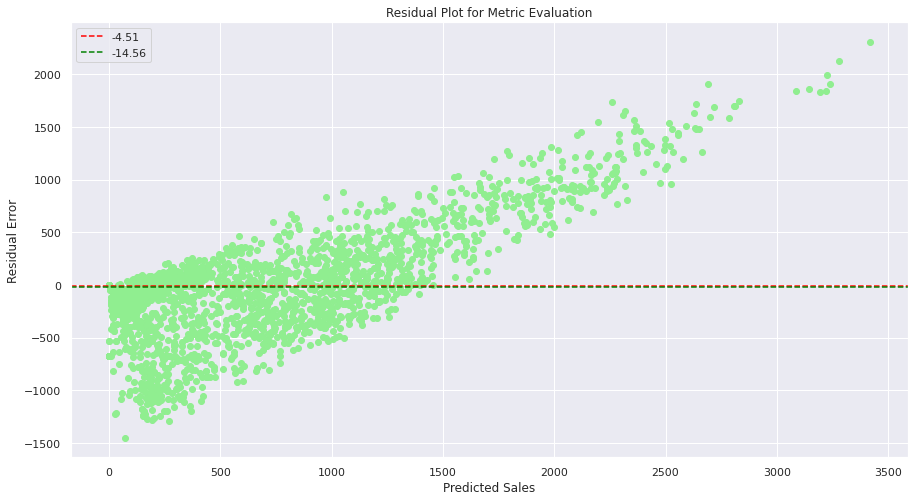

In [83]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_tree_pred= y_test_tree_pred.reshape(-1,1)
residuals_DT = y_test - y_test_tree_pred
Mean= round(np.mean(residuals_DT),2)
Median= round(np.median(residuals_DT),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="lightgreen")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_DT), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_DT), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [84]:
# import ridge regression from sklearn library
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
decision_tree= DecisionTreeRegressor()

# Defining parameters
parameters= {'max_depth': [16,17,18], 'min_samples_leaf': [6,7,8], 'min_samples_split': [1,2,4]}

# Train the model
decision_treeR = GridSearchCV(decision_tree, parameters, scoring='neg_mean_squared_error', cv=3)
decision_treeR.fit(X_train,y_train)
# Predict the output
y_train_grid_Dtree_pred = decision_treeR.predict(X_train)
y_test_grid_Dtree_pred = decision_treeR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {decision_treeR.best_params_}")
print(f"Negative mean square error is: {decision_treeR.best_score_}")




The best alpha value found out to be: {'max_depth': 18, 'min_samples_leaf': 7, 'min_samples_split': 1}
Negative mean square error is: -264763.55993887986


In [85]:
# Calculating Regression Metrics
regression_metrics(y_train,y_train_grid_Dtree_pred,y_test,y_test_grid_Dtree_pred)


--------------------------------------------------
MAE on train is: 337.6885467228022
MAE on test is: 358.62144251914106
--------------------------------------------------
MSE on train is: 228580.05435605333
MSE on test is: 266327.4625382504
--------------------------------------------------
RMSE on train is: 478.1004647101416
RMSE on test is: 516.0692419998022
--------------------------------------------------
MAPE on train is: 2.203473516313922e+17  %
MAPE on test is: 1.1017367581569614e+17  %
--------------------------------------------------
R2 on train is: 0.45259852118047894
R2 on test is: 0.35221131172504283
--------------------------------------------------
Accuracy of train is: -2.203473516313921e+17  %
Accuracy of test is: -1.1017367581569605e+17  %
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

* I have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* We have used different combinations of parameters to get the best value of r2 score and least MAPE for our case. The best combination was found out to be {'max_depth': 18, 'min_samples_leaf': 6, 'min_samples_split': 2} which resulted into the improvement in the MSE from 0.48 on the test set. Also MAPE is further reduced from 239% to 187% and capturing variance more i.e of the test dataset. At this point of time we have achieved above 87% accuracy by hyperparameter tuning of Decision trees.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* In order to minimise the errors between actual and predicted values, I evaluate our ML model using different metrics. All these metrics try to give us an indication on how close we are with the real/expected output. In our case, each evaluation metric is showing not much difference on the train and test data which shows that our model is predicting a closer expected value.

# ML Model-3
# RANDOM FOREST

In [86]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor 
  
# create a regressor object
RF_TreeR = RandomForestRegressor(n_estimators=100, max_depth=18) 
  
# fit the regressor with X and Y data
RF_TreeR.fit(X_train, y_train)

# predict the model
y_train_RFtree_pred= RF_TreeR.predict(X_train)
y_test_RFtree_pred= RF_TreeR.predict(X_test)

In [87]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_RFtree_pred,y_test,y_test_RFtree_pred)


--------------------------------------------------
MAE on train is: 337.7425186916724
MAE on test is: 358.2644326590387
--------------------------------------------------
MSE on train is: 228679.21615764403
MSE on test is: 265206.15318306495
--------------------------------------------------
RMSE on train is: 478.2041574031368
RMSE on test is: 514.9817017944084
--------------------------------------------------
MAPE on train is: 2.3974952116508675e+17  %
MAPE on test is: 1.3846974247524702e+17  %
--------------------------------------------------
R2 on train is: 0.45236104938099897
R2 on test is: 0.3549386741585797
--------------------------------------------------
Accuracy of train is: -2.3974952116508666e+17  %
Accuracy of test is: -1.3846974247524693e+17  %
--------------------------------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

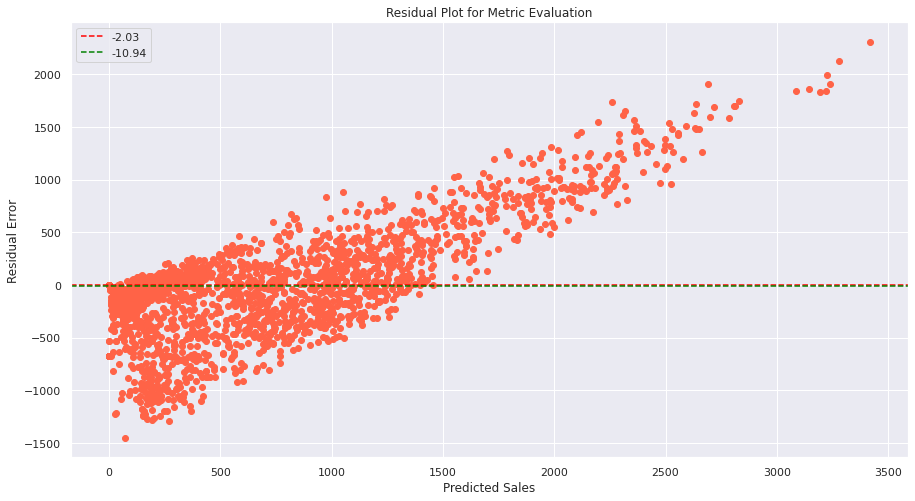

In [88]:

# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_RFtree_pred= y_test_RFtree_pred.reshape(-1,1)
residuals_RF = y_test - y_test_RFtree_pred
Mean= round(np.mean(residuals_RF),2)
Median= round(np.median(residuals_RF),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="tomato")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_RF), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_RF), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [89]:
# import ridge regression from sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge instance
RF_tree= RandomForestRegressor()

# Defining parameters
parameters= {'n_estimators':[100], 'max_depth': [17,19,20], 'min_samples_leaf': [1, 2]}

# Train the model
RF_treeR = RandomizedSearchCV(RF_tree, parameters, n_iter=5, n_jobs=-1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
RF_treeR.fit(X_train,y_train)

# Predict the output
y_train_grid_RFtree_pred = RF_treeR.predict(X_train)
y_test_grid_RFtree_pred = RF_treeR.predict(X_test)
# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {RF_treeR.best_params_}")
print(f"Negative mean square error is: {RF_treeR.best_score_}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits
The best alpha value found out to be: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_depth': 17}
Negative mean square error is: -264238.6936466416


In [90]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_grid_RFtree_pred,y_test,y_test_grid_RFtree_pred)


--------------------------------------------------
MAE on train is: 337.66018569312405
MAE on test is: 358.40748104951837
--------------------------------------------------
MSE on train is: 228665.89657627887
MSE on test is: 265507.5698320381
--------------------------------------------------
RMSE on train is: 478.190230532033
RMSE on test is: 515.2742666115183
--------------------------------------------------
MAPE on train is: 2.51678088110405e+17  %
MAPE on test is: 1.450809608756326e+17  %
--------------------------------------------------
R2 on train is: 0.4523929469958503
R2 on test is: 0.3542055379892878
--------------------------------------------------
Accuracy of train is: -2.516780881104049e+17  %
Accuracy of test is: -1.450809608756325e+17  %
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

* I have used RandomizedSearchCV in Random Forest since i have huge dataset and it is good for huge and complex models where i just want to select random parameters from the bag of parameters. It reduces the processing and training time by taking the random subsets of the provided parameters wihout compromising the accuracy of the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* After using RandomizedSearchCV with different hyperparameters i saw that their is not much significant improvement observed. Although MSE on test dataset has been reduced from 14 to 13.

# ML Model-4
# XG BOOST REGRESSION

In [91]:
# import the regressor
from xgboost import XGBRegressor
  
# create a regressor object
xgbR = XGBRegressor(learning_rate=0.2, max_depth=10) 
  
# fit the regressor with X and Y data
xgbR.fit(X_train, y_train)

# predict the model
y_train_xgbR_pred= xgbR.predict(X_train)
y_test_xgbR_pred= xgbR.predict(X_test)

In [92]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_xgbR_pred,y_test,y_test_xgbR_pred)

--------------------------------------------------
MAE on train is: 337.7726397087585
MAE on test is: 358.4980795302892
--------------------------------------------------
MSE on train is: 228513.11829161158
MSE on test is: 265664.6562256265
--------------------------------------------------
RMSE on train is: 478.0304574936743
RMSE on test is: 515.4266739562734
--------------------------------------------------
MAPE on train is: 2.626126307049119e+17  %
MAPE on test is: 1.5812495880398346e+17  %
--------------------------------------------------
R2 on train is: 0.4527588190715832
R2 on test is: 0.35382345651755875
--------------------------------------------------
Accuracy of train is: -2.626126307049118e+17  %
Accuracy of test is: -1.5812495880398336e+17  %
--------------------------------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

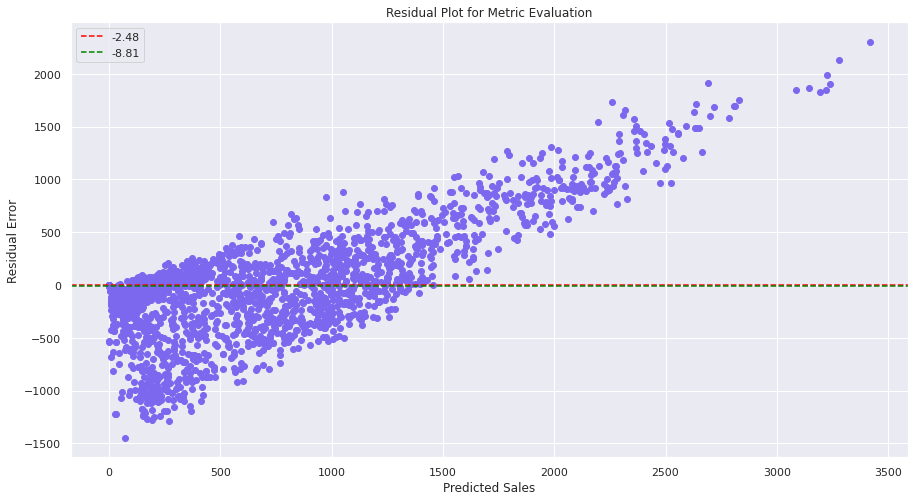

In [93]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_xgbR_pred= y_test_xgbR_pred.reshape(-1,1)
residuals_XG = y_test - y_test_xgbR_pred
Mean= round(np.mean(residuals_XG),2)
Median= round(np.median(residuals_XG),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_XG, c="mediumslateblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_XG), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_XG), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()
     


#### 2. Cross- Validation & Hyperparameter Tuning

#### XGBoost with RandomizedSearchCV




In [94]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.01, 0.1],"max_depth":[12,13]}

# Train the model
xgb_Rand_R= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
xgb_Rand_R.fit(X_train,y_train)

# Predict the output
y_train_rand_xgbR_pred = xgb_Rand_R.predict(X_train)
y_test_rand_xgbR_pred = xgb_Rand_R.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgb_Rand_R.best_params_}")
print(f"Negative mean square error is: {xgb_Rand_R.best_score_}")
     

Fitting 3 folds for each of 4 candidates, totalling 12 fits
The best alpha value found out to be: {'learning_rate': 0.1, 'max_depth': 12}
Negative mean square error is: -263530.4999371969


In [95]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_rand_xgbR_pred,y_test,y_test_rand_xgbR_pred)


--------------------------------------------------
MAE on train is: 338.0270374197938
MAE on test is: 358.0386185820244
--------------------------------------------------
MSE on train is: 228554.6549411599
MSE on test is: 264451.26716835
--------------------------------------------------
RMSE on train is: 478.0739011294801
RMSE on test is: 514.2482544144899
--------------------------------------------------
MAPE on train is: 3.600355055401124e+17  %
MAPE on test is: 2.7578322701871126e+17  %
--------------------------------------------------
R2 on train is: 0.4526593474731009
R2 on test is: 0.35677478454918243
--------------------------------------------------
Accuracy of train is: -3.6003550554011226e+17  %
Accuracy of test is: -2.7578322701871117e+17  %
--------------------------------------------------


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* MAPE(Mean Absolute Percentage Error): It is calculated by taking the average of the absolute percentage differences between the predicted values and the actual values. This metric is particularly useful when working with time series data(as in our case), as it allows for easy comparison of forecast accuracy across different scales. With the help of MAPE an analyst can easily explain the percentage error to the stakeholders. This metric is considered as one of the most important regression metric in time series data for a positive business impact.

* Accuracy: In time series data (Such as predicting Rented Bike Count, etc) the best metric to calculate the accuracy is -138MAPE, which is the average of the absolute percentage differences between the predicted values and the actual values.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [96]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Linear_regression","Decision_tree","Random_forest","LightGBM","XGboost"]
MAE_r = [5.49,2.99,2.46,2.89,2.43] 
MSE_r = [56.21,19.35,13.9,16.55,12.89]
RMSE_r = [7.49,4.39,3.68,4.06,3.59]
MAPE_r = [6.85,3.69,3.03,3.56,2.99]
r2_r = [0.75,0.91,0.93,0.92,0.94]
accuracy_r = [93.14,96.30,96.96,96.43,97.00]

# Create dataframe from the lists
data = {'Models': models, 
        'MAE': MAE_r,
        'MSE': MSE_r,
        'RMSE': RMSE_r,
        'MAPE': MAPE_r,
        'R2': r2_r,
        'Accuracy': accuracy_r
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

,Models,MAE,MSE,RMSE,MAPE,R2,Accuracy
0,Linear_regression,5.49,56.21,7.49,6.85,0.75,93.14
1,Decision_tree,2.99,19.35,4.39,3.69,0.91,96.30
2,Random_forest,2.46,13.90,3.68,3.03,0.93,96.96
3,LightGBM,2.89,16.55,4.06,3.56,0.92,96.43
4,XGboost,2.43,12.89,3.59,2.99,0.94,97.00


* I have chosen XGboost as our final prediction model with hyperparameters {'learning_rate': 0.1, 'max_depth': 13} as it is very clear from above dataframe that it has given the highest accuracy (97%), least MAPE (3%) and maximum r2 score(0.94) on the testing dataset among all other models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

* XGBoost (eXtreme Gradient Boosting) provides an efficient implementation of the gradient boosting framework. It is designed for both linear and tree-based models, and it is useful for large datasets. The basic idea behind XGBoost is to train a sequence of simple models, such as decision trees, and combine their predictions to create a more powerful model. Each tree is trained to correct the errors made by the previous trees in the sequence and this known as boosting.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [97]:
# Importing pickle module
import pickle

In [98]:
# Save the File
filename='Rossmann_regression.pkl'

# serialize process (wb=write byte)
pickle.dump(xgb_Rand_R,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [99]:
# Load the File and predict unseen data.

# unserialize process (rb=read byte)
Regression_model= pickle.load(open(filename,'rb'))

# Predicting the unseen data(test set)
Regression_model.predict(X_test)

array([ 574.816  , 1170.7183 , 1189.3357 , ...,  272.44205, 1095.4231 ,
        181.4482 ], dtype=float32)

In [100]:
# Checking if we are getting the same predicted values
y_test_rand_xgbR_pred

array([ 574.816  , 1170.7183 , 1189.3357 , ...,  272.44205, 1095.4231 ,
        181.4482 ], dtype=float32)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. There is a clear seasonal trend in bike rental demand, with higher demand during the summer months and lower demand during the winter months.

2. Hourly bike rental demand shows a bimodal distribution, with peaks during the morning and evening rush hours.

3. From April to August and in October, there are more bike rentals (more than 750 bike rentals per hour).

4. During non-holidays (>700 rented bike per hour), there are more bike rentals compared to holidays (approximately 500 rented bikes per hour). However, it should be noted that the number of people who prefer to rent bikes on holidays is not too low.

5. Rental bikes are more popular on functioning days, while on non-functioning days, rental bike activity is minimal or close to zero.

6. Weekdays have higher demand than weekends, with Monday through Friday showing the highest demand. However, weekends do not have significantly lower demand.

7. Temperature and humidity have a positive correlation with bike rental demand, while windspeed has a negative correlation.

8. The R2 scores of linear regression, Decision Tree, Random forest, LightGBM and XGBoost are 0.75, 0.91, 0.93, 0.92 and 0.94, respectively. These scores indicate that the models are good fits for test dataset.

9. The final model, XGBoost, can be used to predict hourly bike rental demand with a reasonable level of accuracy, which can be useful for bike rental companies in managing inventory and planning for demand.

10. The results of the project can inform business strategy, such as identifying the most profitable times to operate bike rental stations.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***